# **1** Anonimizar archivo

las siguientes celdas van a estar comentadas para que pueda 'ejecutar todo', sin tener que preocuparse de esto, pero no las borro por si tengo que corregir mas adelante o por si se utilizan para otro archivo (de texto exportado de un grupo de WhatsApp)

In [1]:
#%pip install Faker

In [2]:
""" import re
names = set()
input_file = "data/WhatsApp chat.txt"
output_file = "data/AnonymChat.txt"
with open(input_file,encoding='utf-8') as f:
    #print(f.read())
    #for i in range(10):
    for i in f:
        text=i
        match = re.search(r"\d{2}/\d{2}/\d{2}, \d{2}:\d{2} - (.*?):", text)
        #print(text)
        if match:
            name = match.group(1)
            names.add(name)
names """

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\155631198.py:1: SyntaxWarning: invalid escape sequence '\d'
  """ import re


' import re\nnames = set()\ninput_file = "data/WhatsApp chat.txt"\noutput_file = "data/AnonymChat.txt"\nwith open(input_file,encoding=\'utf-8\') as f:\n    #print(f.read())\n    #for i in range(10):\n    for i in f:\n        text=i\n        match = re.search(r"\\d{2}/\\d{2}/\\d{2}, \\d{2}:\\d{2} - (.*?):", text)\n        #print(text)\n        if match:\n            name = match.group(1)\n            names.add(name)\nnames '

In [3]:
""" from faker import Faker
fake = Faker('ja_JP') #para generar nombres aleatorios (falsos) en japones (katanaka)
anonym_map = {}
for nombre in names:
    anonym_map[nombre]=fake.kana_name()

anonym_map """

" from faker import Faker\nfake = Faker('ja_JP') #para generar nombres aleatorios (falsos) en japones (katanaka)\nanonym_map = {}\nfor nombre in names:\n    anonym_map[nombre]=fake.kana_name()\n\nanonym_map "

In [4]:
""" with open(input_file, 'r', encoding='utf-8') as infile, \
         open(output_file, 'w', encoding='utf-8') as outfile:
        
        for line in infile:
            if (not re.search(r":.*@[\S]+", line)) and re.search(r"\d{2}/\d{2}/\d{2}, \d{2}:\d{2} - (.*?):", line): #para quitar las menciones "@fulanito" y las lineas sueltas (que son mas dificiles de verificar, en mi caso particular)
                for real_name, anon_name in anonym_map.items():
                    line = line.replace(real_name, anon_name)
                outfile.write(line) """

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\1720068101.py:1: SyntaxWarning: invalid escape sequence '\S'
  """ with open(input_file, 'r', encoding='utf-8') as infile, \


' with open(input_file, \'r\', encoding=\'utf-8\') as infile,          open(output_file, \'w\', encoding=\'utf-8\') as outfile:\n\n        for line in infile:\n            if (not re.search(r":.*@[\\S]+", line)) and re.search(r"\\d{2}/\\d{2}/\\d{2}, \\d{2}:\\d{2} - (.*?):", line): #para quitar las menciones "@fulanito" y las lineas sueltas (que son mas dificiles de verificar, en mi caso particular)\n                for real_name, anon_name in anonym_map.items():\n                    line = line.replace(real_name, anon_name)\n                outfile.write(line) '

# **2** Ingesta y limpieza de datos

In [246]:
import re
import pandas as pd
output_file = "data/AnonymChat.txt"
fechas = []
usuarios = []
mensajes = []
media = []
borrados = []
links = []
url_pattern = r'https?://\S+'
with open(output_file,encoding='utf-8') as f:
    #print(f.read())
    """ for i in range(10):
        print(f.readline().split(" - ")[0])
        print(f.readline().split(" - ")[1].split(":")[0])
        print(f.readline().split(" - ")[1].split(":")[1].strip() )
        print(f.readline().split(" - ")[1].split(":")[1].strip() =="<Media omitted>") """
    for i in f:
        if ' - ' in i:
            fechas.append(i.split(" - ")[0])
            usuarios.append(i.split(" - ")[1].split(":")[0])
            if i.split(" - ")[1].split(":")[1].strip() =="<Media omitted>":
                mensajes.append(None)
                media.append(True)
                borrados.append(False)
                links.append(False)
            elif i.split(" - ")[1].split(":")[1].strip() =="This message was deleted":
                mensajes.append(None)
                borrados.append(True)
                media.append(False)
                links.append(False)
            else:
                msg = ":".join(i.split(" - ")[1].split(":")[1:]).strip().replace("<This message was edited>",'')
                media.append(False)
                borrados.append(False)
                link = re.search(url_pattern, msg)
                if link:
                    links.append(True)
                    msg = msg.replace(link.group(), '').strip()#qutar el link del texto
                    if len(msg)==0:
                        msg = None
                else:
                    links.append(False)
                mensajes.append(msg)
df = pd.DataFrame(data={'fecha':fechas,'usuario':usuarios,'mensaje':mensajes,'isMedia':media,'borrado':borrados,'isLink':links})
df['fecha']=pd.to_datetime(df['fecha'],dayfirst=True)
df.head(30)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\2437077979.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha']=pd.to_datetime(df['fecha'],dayfirst=True)


,fecha,usuario,mensaje,isMedia,borrado,isLink
0,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False
1,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,False,False,False
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos:,False,False,False
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,False,False,False
5,2023-05-23 22:41:00,ヤマダ カオリ,Hace mucho no me perdía dos seguidas,False,False,False
6,2023-05-23 22:41:00,オオタ レイ,Cuentos:,False,False,False
7,2023-05-23 22:41:00,オオタ レイ,Tienes tres ahijados Argenis,False,False,False
8,2023-05-23 22:41:00,タカハシ ミカコ,"Cómo es esa frase de Jung, en su epitafio?",False,False,False
9,2023-05-23 22:41:00,オオタ レイ,Ya te están esperando,False,False,False


In [324]:
df['palabras'] = df['mensaje'].str.count(' ')+1
df.head()

,fecha,usuario,mensaje,isMedia,borrado,isLink,tiempoRespuesta,palabras
0,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False,NaN,NaN
1,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False,0.0,NaN
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,False,False,False,14.0,1.0
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos:,False,False,False,0.0,8.0
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,False,False,False,1.0,2.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11886 entries, 0 to 11885
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     11886 non-null  datetime64[ns]
 1   usuario   11886 non-null  object        
 2   mensaje   8141 non-null   object        
 3   isMedia   11886 non-null  bool          
 4   borrado   11886 non-null  bool          
 5   isLink    11886 non-null  bool          
 6   palabras  8141 non-null   float64       
dtypes: bool(3), datetime64[ns](1), float64(1), object(2)
memory usage: 406.4+ KB


In [67]:
df.describe(include='all')

,fecha,usuario,mensaje,isMedia,borrado,isLink,palabras
count,11886,11886,8141,11886,11886,11886,8141.000000
unique,NaN,49,7151,2,2,2,NaN
top,NaN,オオタ レイ,Confirmo,False,False,False,NaN
freq,NaN,2848,127,8377,11815,11687,NaN
mean,2024-06-22 05:49:26.052498688,NaN,NaN,NaN,NaN,NaN,6.595259
min,2023-01-06 12:13:00,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2023-10-23 10:46:30,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2024-06-21 00:48:00,NaN,NaN,NaN,NaN,NaN,4.000000
75%,2025-03-15 18:00:45,NaN,NaN,NaN,NaN,NaN,8.000000
max,2025-12-09 14:39:00,NaN,NaN,NaN,NaN,NaN,195.000000


Tambien se podrian ver 
- las menciones (en el mensaje de otros usuarios)
- el usuario que mando el mensaje anterior (para hacer una cadena de markov)
- si el mensaje contiene un link web (la columna cambiaria a tipo de categorias)

# **3** Análisis exploratorio de datos

## Promedio de mensajes

Que tantos mensajes se enviaron?

In [68]:
total_mensajes = len(df)
total_mensajes

11886

que tantos por persona?

In [69]:
total_usuarios = len(df['usuario'].unique())
total_usuarios

49

In [70]:
mensajes_promedio_usuario = total_mensajes/total_usuarios
round(mensajes_promedio_usuario,2)

242.57

que tantos por dia?

In [71]:
rango_fechas = df['fecha'].max() - df['fecha'].min()
rango_fechas.days

1068

In [72]:
mensajes_promedio_dia = total_mensajes / rango_fechas.days
round(mensajes_promedio_dia,2)

11.13

que tantos envia cada usuario por semana?

In [73]:
mensajes_promedio_usuario_semana = total_mensajes/(rango_fechas.days/7 * total_usuarios)
round(mensajes_promedio_usuario_semana,2)

1.59

## Nube de palabras

In [15]:
""" %pip install spacy
%pip install wordcloud """

' %pip install spacy\n%pip install wordcloud '

In [16]:
#!python -m spacy download de_core_news_sm

In [74]:
regex_esp = r'([a-zA-Zá-ü\s]+)' #para exluir otros caracteres que no esten en el español normal
texto = ' '.join(df['mensaje'].dropna().str.lower().str.extract(regex_esp, expand=False).dropna().to_list())
len(texto)

172341

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

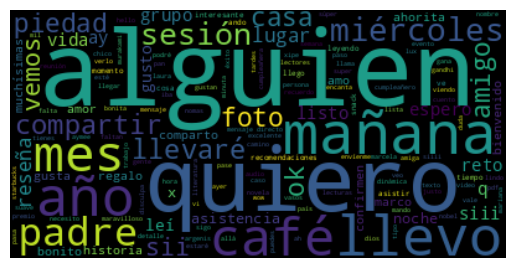

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
nlp = spacy.load('es_core_news_md')
plt.style.use('ggplot')

palabras_paro = nlp.Defaults.stop_words
palabras_paro.update([
  "http",'https',#vinculos
  'This','message','was','deleted','edited','This message',#cuando borran mensajes
  'libro','leer','leído','libros','club','lectura',#no es sorpresa en un circulo de lectura
  'confirmo',#hacemos pase de lista
  'Gracias','feliz','cumpleaños','cumple','felicidades','favor',#parece que somos muy agradecidos
  'jaja','jajaja','jajajaja',#y muy risueños
  'hola','holaa','holaaa','oigan', #salu2
])
wc = WordCloud(stopwords=palabras_paro).generate(texto)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Frecuencia de mensajes

In [ ]:
%pip install seaborn

In [81]:
df['isMedia'] = df['isMedia'].astype(int)
df['isMedia'].describe()

count    11886.000000
mean         0.295221
std          0.456161
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isMedia, dtype: float64

por usuario

<Axes: title={'center': 'Mensajes por usuario'}, xlabel='Usuarios', ylabel='Mensajes'>

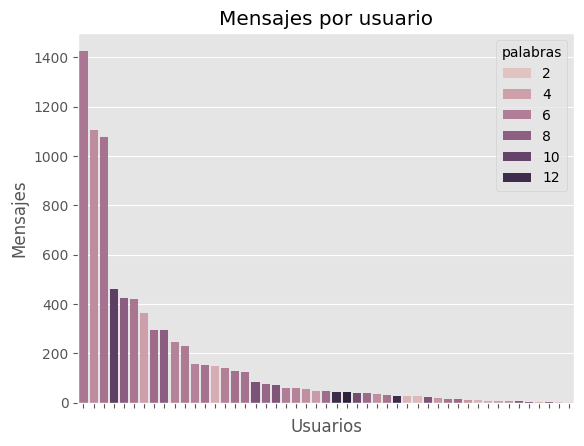

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

mensajes_por_usuario = df[['mensaje','isMedia','palabras']].groupby(df.usuario).agg({'mensaje':'count','isMedia':'sum','palabras':'mean'}).sort_values('mensaje',ascending=False).reset_index()
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
plt.xlabel( "Usuarios" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por usuario')
sns.barplot(data=mensajes_por_usuario,x=mensajes_por_usuario.index,y='mensaje',hue='palabras')

por hora

<Axes: title={'center': 'Mensajes por hora'}, xlabel='Hora', ylabel='Mensajes'>

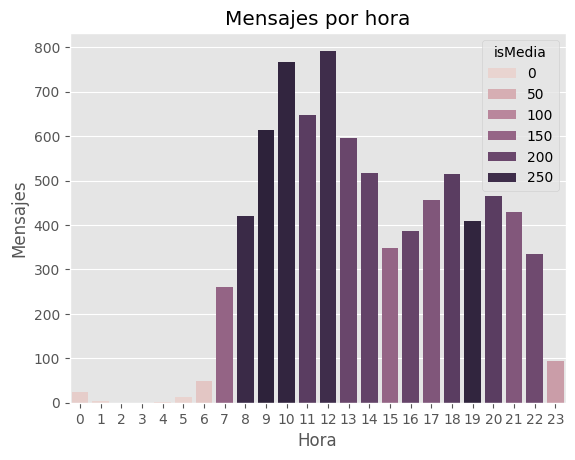

In [204]:
mensajes_por_hora = df[['mensaje','isMedia','palabras']].groupby(df.fecha.dt.hour).agg({'mensaje':'count','isMedia':'sum','palabras':'mean'}).reset_index(drop=True)
plt.xlabel( "Hora" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por hora')
sns.barplot(data=mensajes_por_hora,x=mensajes_por_hora.index,y='mensaje',hue='isMedia')

por dia de la semana

C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\3116982689.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['L','M','M','J','V','S','S'])


<Axes: title={'center': 'Mensajes por dia de la semana'}, xlabel='Dia', ylabel='Mensajes'>

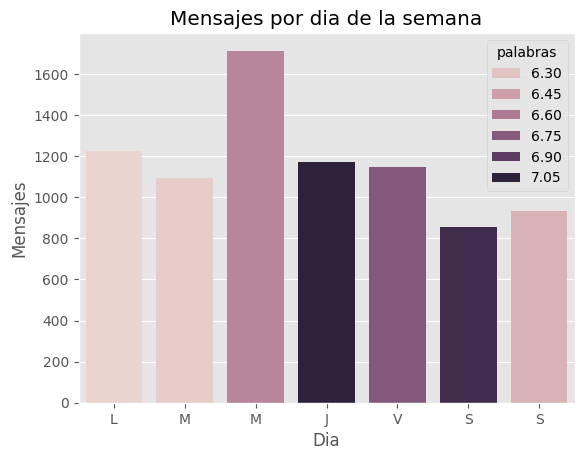

In [202]:
mensajes_por_dia = df[['mensaje','isMedia','palabras']].groupby(df.fecha.dt.weekday).agg({'mensaje':'count','isMedia':'sum','palabras':'mean'}).reset_index(drop=True)
plt.gca().set_xticklabels(['L','M','M','J','V','S','S'])
plt.xlabel( "Dia" )
plt.ylabel( "Mensajes" )
plt.title('Mensajes por dia de la semana')
sns.barplot(data=mensajes_por_dia,x=mensajes_por_dia.index,y='mensaje',hue='palabras')

Combinando las 2 en un heat map podemos ver la combinacion de horas y dias en que se mandan mas mensajes

<Axes: xlabel='fecha', ylabel='fecha'>

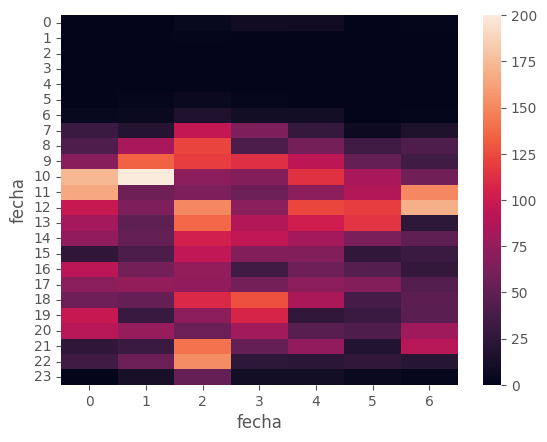

In [213]:
sns.heatmap(df.groupby([df.fecha.dt.hour,df.fecha.dt.weekday]).count()['mensaje'].unstack().fillna(0))

por tipo de mensaje (de texto o imagenes/stickers)

In [85]:
df.groupby('isMedia').count()['fecha']

isMedia
0    8377
1    3509
Name: fecha, dtype: int64

# **4** Otros análisis

## Respuestas de otros usuarios
Para simpliflicar tomaremos en cuenta quien envia un mensaje despues de quien

In [187]:
df['sucesor']=None
df['sucesor'].iloc[:-1]=df['usuario'].iloc[1:]
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\2593573161.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['sucesor'].iloc[:-1]=df['usuario'].iloc[1:]
C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\2593573161.py:2: SettingWithCopyW

,fecha,usuario,mensaje,isMedia,borrado,isLink,palabras,anterior,sucesor
0,2023-05-23 22:26:00,ヤマダ カナ,None,1,False,False,NaN,None,ヤマダ カナ
1,2023-05-23 22:26:00,ヤマダ カナ,None,1,False,False,NaN,ヤマダ カナ,ヤマダ カオリ
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,0,False,False,1.0,ヤマダ カナ,オオタ レイ
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos:,0,False,False,8.0,ヤマダ カオリ,ヤマダ カオリ
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,0,False,False,2.0,オオタ レイ,ヤマダ カオリ


y hacemos una matrix de manera que los renglones y columnas tengan el mismo orden
Y para mejorar la visualizacion, normalizaremos los renglones para que sumen 1. Por que de otra forma se ve todo plano con unos cuantos picos

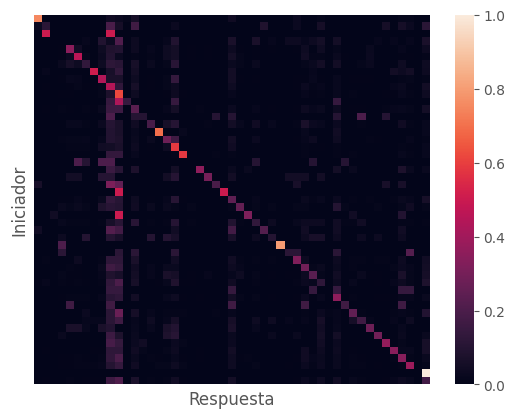

In [191]:
pivot_df=df[['usuario','sucesor','isMedia']].groupby(['usuario','sucesor']).count().unstack().fillna(0) #para que no se vean huecos
ax = sns.heatmap(pivot_df.div(pivot_df.sum(axis=1), axis=0), xticklabels=False, yticklabels=False) #noramlizar para que los rengloes sumen 1
ax.set(xlabel="Respuesta", ylabel="Iniciador");

Es interesante notar que la mayoria de los usuarios parecen mandar un mensaje tras otro, por eso la diagonal es mas poblada que el resto. Tambien notamos que hay 2 columnas notorias, es decir a estos 2 usuarios la matoria le contentan.

Si sumamos las columnas de tal manera que contamos el numero total de respuestas por cada usuario, podemos comparar con el numero total de mensajes que envia dicho usuario, opteniendo una tasa de respuesta del tipo mensajes respondidos/mensajes enviados. Entre mayor sea esta tasa mayor seria su influencia (independientemente de su participacion).

In [192]:
respuestas_por_usuario=pd.DataFrame({'respuestas':pivot_df.sum(axis=1).sort_values(ascending=False)})
respuestas_por_usuario.head()

,respuestas
usuario,
オオタ レイ,2848.0
オオタ ハルカ,1804.0
サトウ アツシ,1282.0
オガワ タクマ,630.0
タカハシ ミカコ,524.0


<Axes: xlabel='porcentajeMensajes', ylabel='tasaInfluencia'>

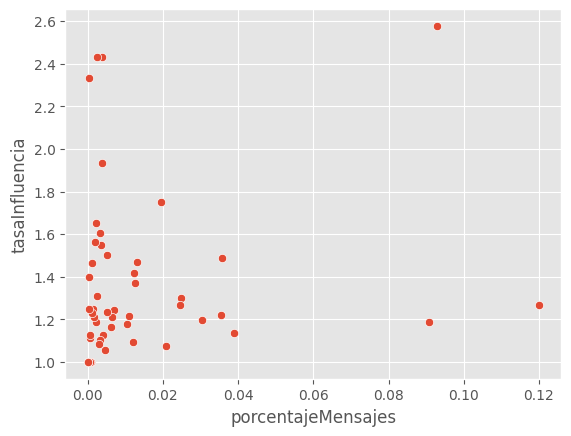

In [193]:
influencia=mensajes_por_usuario.join(respuestas_por_usuario,on='usuario')
influencia['tasaInfluencia']=influencia['respuestas']/influencia['mensaje']
influencia['porcentajeMensajes']=influencia['mensaje']/total_mensajes
influencia.sort_values('tasaInfluencia',ascending=False)
sns.scatterplot(data=influencia,x='porcentajeMensajes',y='tasaInfluencia')

Aqui se puede apreciar 2 usuarios con mucha participacion pero poca respuesta (esquina inferior derecha), 
un unico usuario con mucha participacion y respuesta (esquina superior derecha). 
Y una grupo de 3 con poca participacion pero mucha respuesta (esquina superior izquierda).

## Tiempos de respuesta
Ahora consideramos el intervalo de tiempo entre cada mensaje

In [286]:
df['tiempoRespuesta']=None
df['tiempoRespuesta'].iloc[1:]=df['fecha'].iloc[:-1]
df['tiempoRespuesta']=pd.to_datetime(df['tiempoRespuesta'])
df['tiempoRespuesta']=(df['fecha']-df['tiempoRespuesta'])/pd.Timedelta(minutes=1)
df.head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\3737161564.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['tiempoRespuesta'].iloc[1:]=df['fecha'].iloc[:-1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_19444\3737161564.py:2: SettingWit

,fecha,usuario,mensaje,isMedia,borrado,isLink,tiempoRespuesta
0,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False,NaN
1,2023-05-23 22:26:00,ヤマダ カナ,None,True,False,False,0.0
2,2023-05-23 22:40:00,ヤマダ カオリ,Jajaja,False,False,False,14.0
3,2023-05-23 22:40:00,オオタ レイ,Libros que pueden gustarles a los 3 nuevos:,False,False,False,0.0
4,2023-05-23 22:41:00,ヤマダ カオリ,Los extrañé,False,False,False,1.0
5,2023-05-23 22:41:00,ヤマダ カオリ,Hace mucho no me perdía dos seguidas,False,False,False,0.0
6,2023-05-23 22:41:00,オオタ レイ,Cuentos:,False,False,False,0.0
7,2023-05-23 22:41:00,オオタ レイ,Tienes tres ahijados Argenis,False,False,False,0.0
8,2023-05-23 22:41:00,タカハシ ミカコ,"Cómo es esa frase de Jung, en su epitafio?",False,False,False,0.0
9,2023-05-23 22:41:00,オオタ レイ,Ya te están esperando,False,False,False,0.0


In [287]:
df['tiempoRespuesta'].describe()

count    11885.000000
mean       102.472865
std        699.039327
min          0.000000
25%          0.000000
50%          1.000000
75%         13.000000
max      62348.000000
Name: tiempoRespuesta, dtype: float64

Vemos que la mayoria de los mensajes se responden en menos de 15 minutos

<Axes: xlabel='tiempoRespuesta', ylabel='Count'>

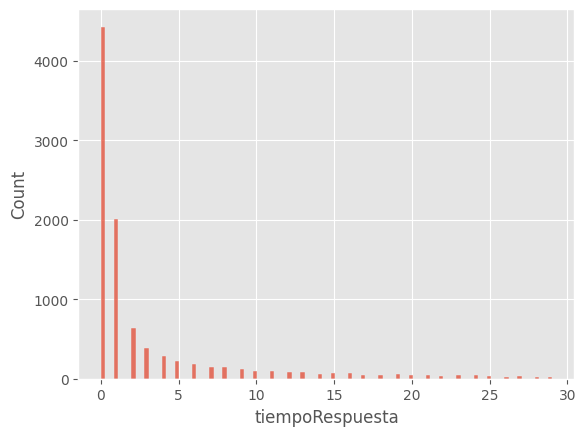

In [338]:
sns.histplot(data=df[df['tiempoRespuesta']<30],x='tiempoRespuesta')

Si ahora agrupamos por usuario y sacamos el tiempo de respuesta promedio

In [309]:
tiempoRespuesta_por_usuario = df[['usuario','tiempoRespuesta']].groupby('usuario').mean().sort_values('tiempoRespuesta')
tiempoRespuesta_por_usuario.describe()

,tiempoRespuesta
count,49.000000
mean,53.180706
std,43.867083
min,0.200000
25%,22.500000
50%,43.076923
75%,71.052632
max,183.450140


Y la mayoria de los usuarios responden en promedio en alrededor de una hora

<Axes: xlabel='tiempoRespuesta', ylabel='Count'>

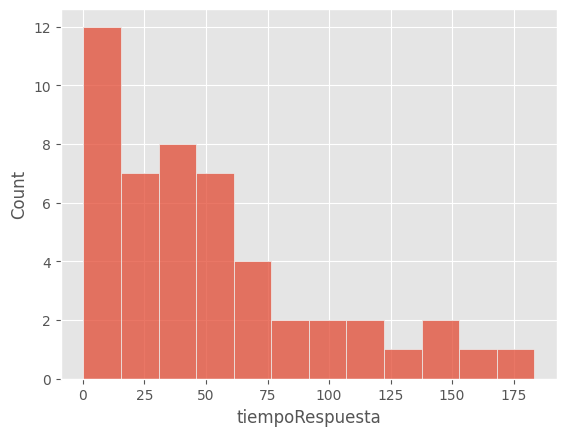

In [306]:
sns.histplot(data=tiempoRespuesta_por_usuario,x='tiempoRespuesta',binwidth=15)

<Axes: xlabel='tiempoRespuesta', ylabel='tasaInfluencia'>

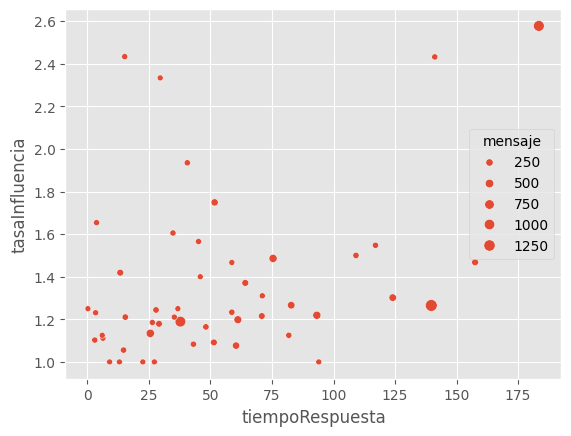

In [320]:
sns.scatterplot(data=influencia.join(tiempoRespuesta_por_usuario,on='usuario'),x='tiempoRespuesta',y='tasaInfluencia',size='mensaje')

Parece que quien tiene mas popularidad en el grupo se toma su tiempo para contestar

Si ahora dividimos en bloques de conversacion, de tal manera que si un mensje esta separado por mas de 1 hora de otro sigfinican que (problamente) formen parte de otro tema

In [360]:
break_points = df['tiempoRespuesta']>60
df['block'] = break_points.cumsum()
conversaciones = df[['block','mensaje','palabras','fecha','tiempoRespuesta']].groupby('block').agg({'mensaje':'count','palabras':'sum','fecha':'median','tiempoRespuesta':'median'})
conversaciones = conversaciones[conversaciones['mensaje']>10]
conversaciones.head()

,mensaje,palabras,fecha,tiempoRespuesta
block,,,,
0,31,174.0,2023-05-23 22:53:00,0.0
3,31,205.0,2023-05-24 07:28:00,1.0
4,27,207.0,2023-05-24 13:07:00,0.0
5,14,32.0,2023-05-24 19:33:00,1.0
6,15,59.0,2023-05-25 09:13:00,1.0


In [361]:
conversaciones.describe()

,mensaje,palabras,fecha,tiempoRespuesta
count,220.000000,220.000000,220,220.00000
mean,22.781818,146.145455,2024-07-21 23:21:04.227272704,1.35000
min,11.000000,25.000000,2023-05-23 22:53:00,0.00000
25%,13.000000,70.750000,2023-10-27 00:43:22.500000,0.00000
50%,17.000000,109.500000,2024-09-05 01:14:30,1.00000
75%,26.250000,172.250000,2025-04-08 18:53:30,2.00000
max,83.000000,809.000000,2025-09-13 12:37:30,8.00000
std,14.793175,120.406225,NaN,1.52161


<Axes: xlabel='mensaje', ylabel='Count'>

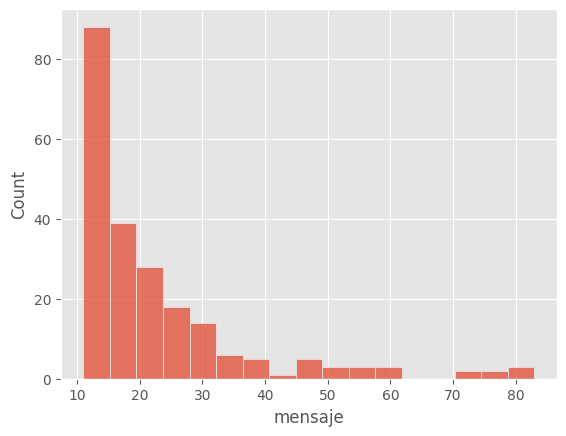

In [362]:
sns.histplot(data=conversaciones,x='mensaje')

<Axes: xlabel='fecha', ylabel='tiempoRespuesta'>

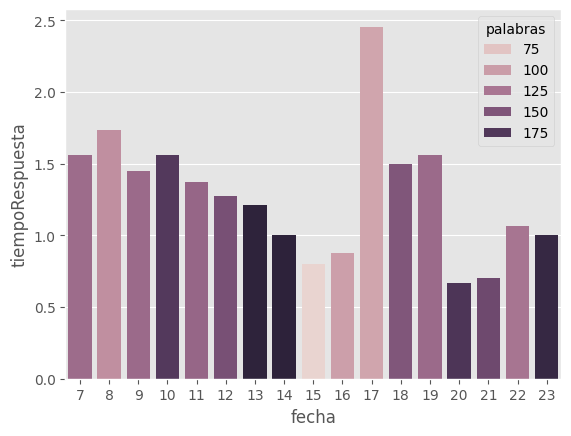

In [377]:
sns.barplot(data=conversaciones.groupby(conversaciones.fecha.dt.hour).mean(),x=conversaciones.groupby(conversaciones.fecha.dt.hour).mean().index,y='tiempoRespuesta',hue='palabras')